In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split #Splitting the data for test/train
from sklearn.metrics import accuracy_score, mean_absolute_percentage_error #Evaluate classification models and evaluate regression models
from sklearn.ensemble import RandomForestRegressor #use for RandomForestRegressor
from sklearn.model_selection import GridSearchCV #Search for the best hyperparameter
from sklearn import metrics


READ DATAFILE

In [2]:
df = pd.read_csv('KDH.csv')
df

,Date,Open,High,Low,Close,Volume,Currency
0,2018-01-02,19551.0,19729.0,19515.0,19551.0,170707,VND
1,2018-01-03,19622.0,19979.0,19622.0,19979.0,278774,VND
2,2018-01-04,20122.0,20978.0,19979.0,20978.0,1001774,VND
3,2018-01-05,21049.0,21049.0,20621.0,20800.0,277778,VND
4,2018-01-08,20693.0,20764.0,20550.0,20586.0,145973,VND
...,...,...,...,...,...,...,...
1059,2022-04-04,53700.0,53700.0,52700.0,52800.0,1086000,VND
1060,2022-04-05,52800.0,52800.0,51600.0,52000.0,1521900,VND
1061,2022-04-06,51600.0,52000.0,50800.0,51000.0,1921900,VND
1062,2022-04-07,51300.0,51600.0,51000.0,51100.0,611400,VND


In [31]:
df.dtypes

Date         object
Open        float64
High        float64
Low         float64
Close       float64
Volume        int64
Currency     object
dtype: object

Convert from Object to DateTime

In [32]:
df['Date'] = pd.to_datetime(df['Date'])

Plotting Trading Volume

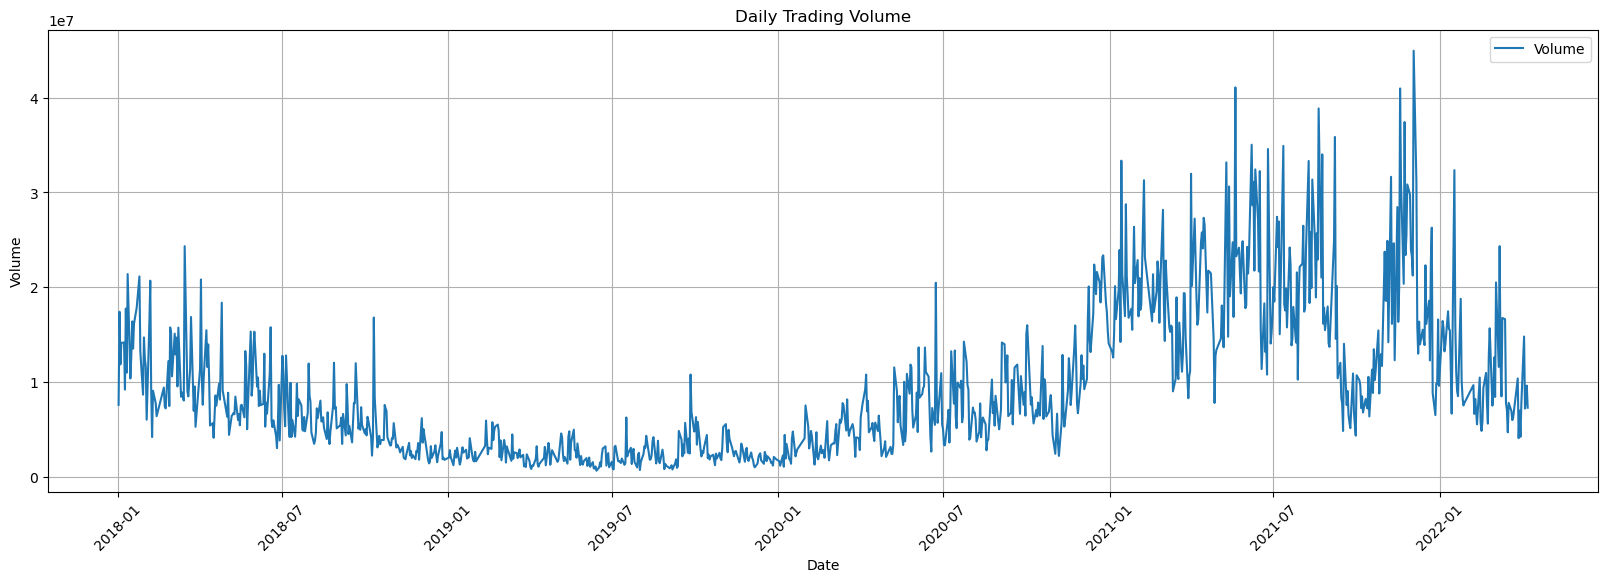

In [33]:
plt.figure(figsize=(20,6))
plt.plot(df['Date'], df['Volume'], label = 'Volume')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('Volume')
plt.title('Daily Trading Volume')

plt.grid(True) #Adding Grid
plt.legend() #note(volume)
plt.show() #display

Plotting Trading Open Price

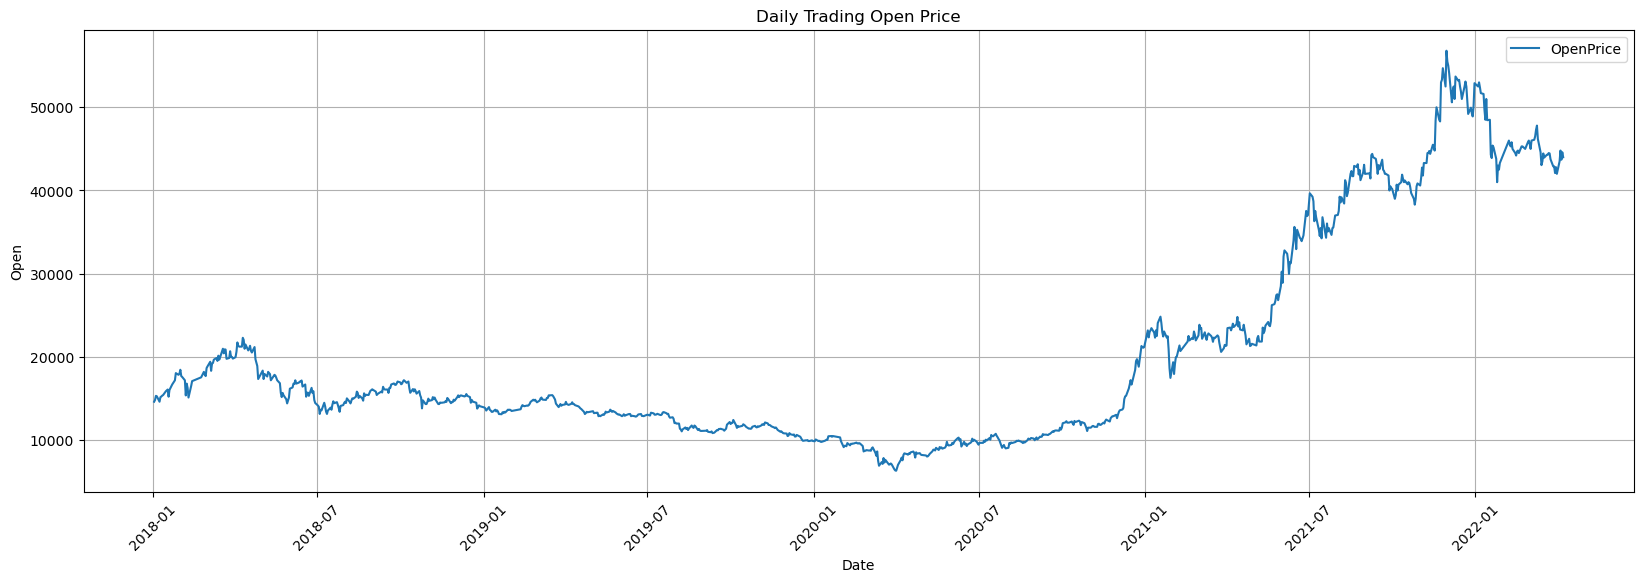

In [34]:
plt.figure(figsize=(20,6))
plt.plot(df['Date'], df['Open'], label   = 'OpenPrice')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('Open')
plt.title('Daily Trading Open Price')

plt.grid(True)
plt.legend()
plt.show()

Plotting Trading High Price

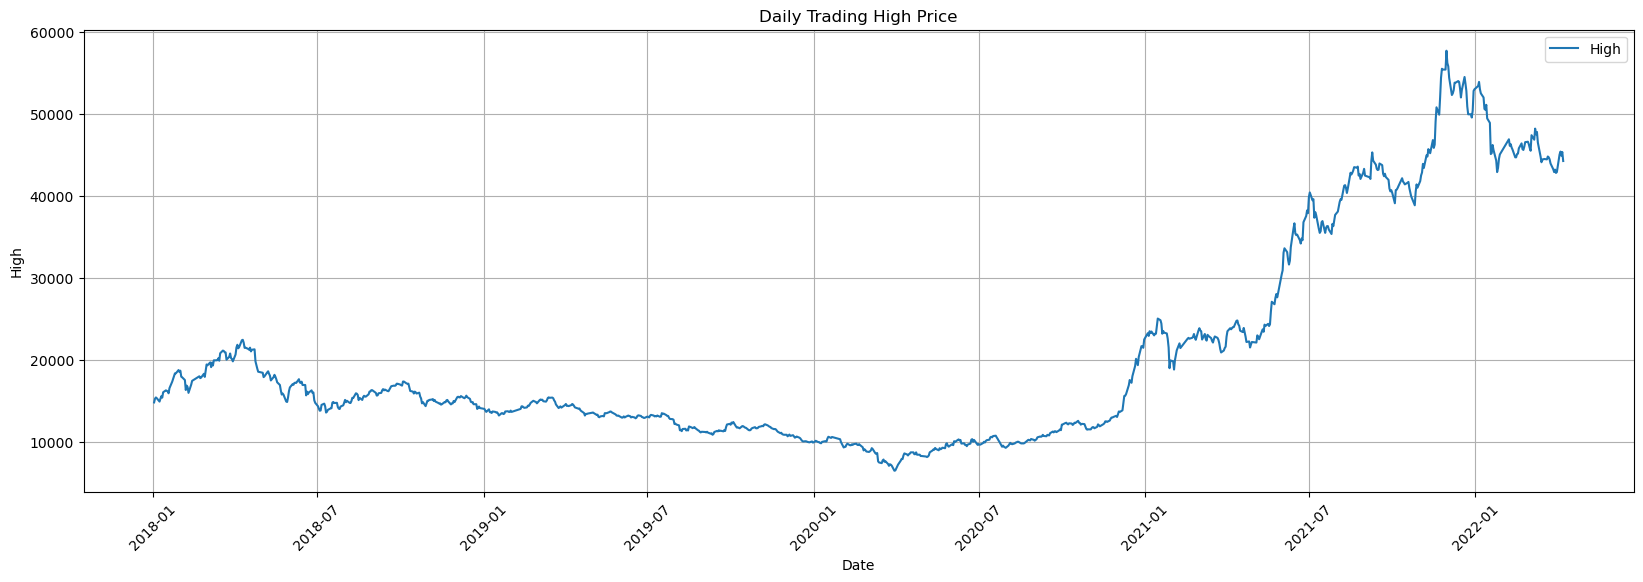

In [35]:
plt.figure(figsize=(20,6))
plt.plot(df['Date'], df['High'], label = 'High')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('High')
plt.title('Daily Trading High Price')

plt.grid(True)
plt.legend()
plt.show()

Plotting Trading Low Price

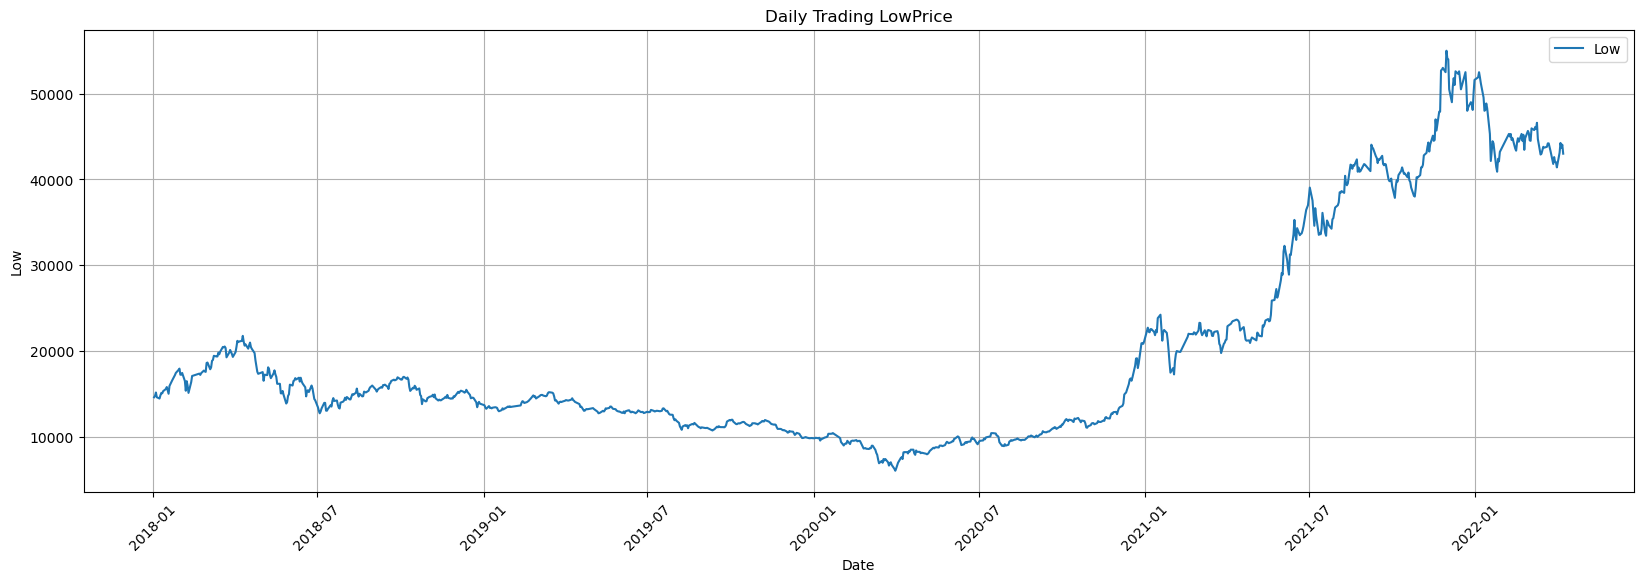

In [36]:
plt.figure(figsize=(20,6))
plt.plot(df['Date'], df['Low'], label = 'Low')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('Low')
plt.title('Daily Trading LowPrice')

plt.grid(True)
plt.legend()
plt.show()

Plotting Trading Close Price

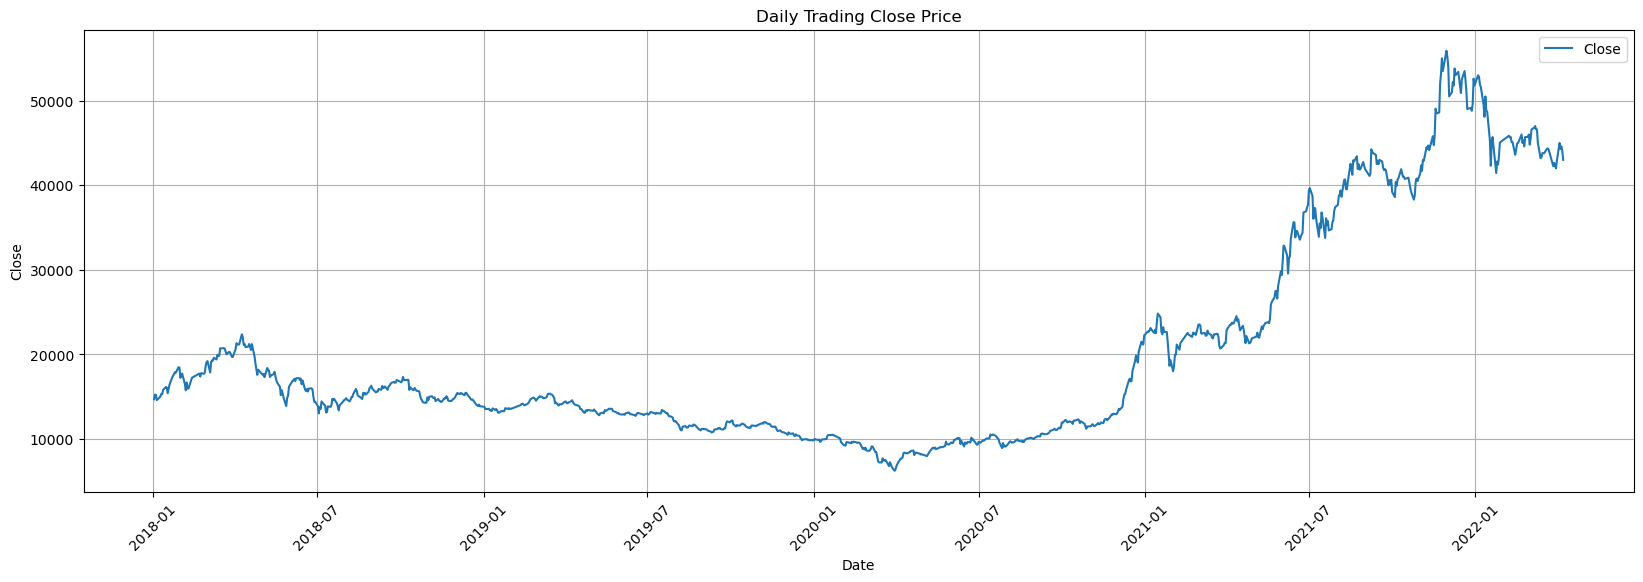

In [37]:
plt.figure(figsize=(20,6))
plt.plot(df['Date'], df['Close'], label = 'Close')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('Close')
plt.title('Daily Trading Close Price')

plt.grid(True)
plt.legend()
plt.show()

Splitting to 20 for testing and 80 for training

In [38]:
X = df[['Open', 'High', 'Low', 'Volume']] #Feature
y = df['Close'] #Target

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 ) #Using 20% for test and pick randomly

Random Forest regressor

In [40]:
# Create Object for RFR
rf = RandomForestRegressor()

#Define the hyperparameter grid
param_grid = {
    'max_depth' : [3, 5, 7, 9], #Maximum depth of each decision tree (try 4 dif depth)
    'min_samples_split' : [2, 5, 10], #Minimum number of samples required to split
    'min_samples_leaf' : [1, 2, 4], #Minimum number of samples that must be present in a leaf node.
    'max_features' : ['auto', 'sqrt'], #Number of features to consider when looking for the best split (Auto for all feature, sqrt for square root of of the total for reducing overfitting)
    'random_state' : [0, 42] #Fixes the random seed
} #GridSearchCV will test 4 x 3 x 3 x 2 x 2 = 144 combinations of hyperparameters.

# Create a GridSearchCV Object
grid_search = GridSearchCV(rf, param_grid, cv = 5, scoring = 'r2') #cv=5 to split training data to 5 folds, 4 for train and 1 for test, r2 for R square

#Fit the GridSearchCV object to training Data
grid_search.fit(X_train, y_train)

#Print the best hypeparameters
print(grid_search.best_params_)

{'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\ADMIN\anaconda3\Lib\site-packag

In [41]:
rf = RandomForestRegressor(max_depth = 9, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 2, random_state = 0)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_features='sqrt', min_samples_leaf=2,
                      random_state=0)

In [21]:
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_percentage_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print(format(mae), format(mape), format(mse), format(r2), format(rmse))

0.010472466279879621 0.010472466279879621 161965.19648607445 0.9989272603866309 402.4489986148238


Visualize Predict Close Price

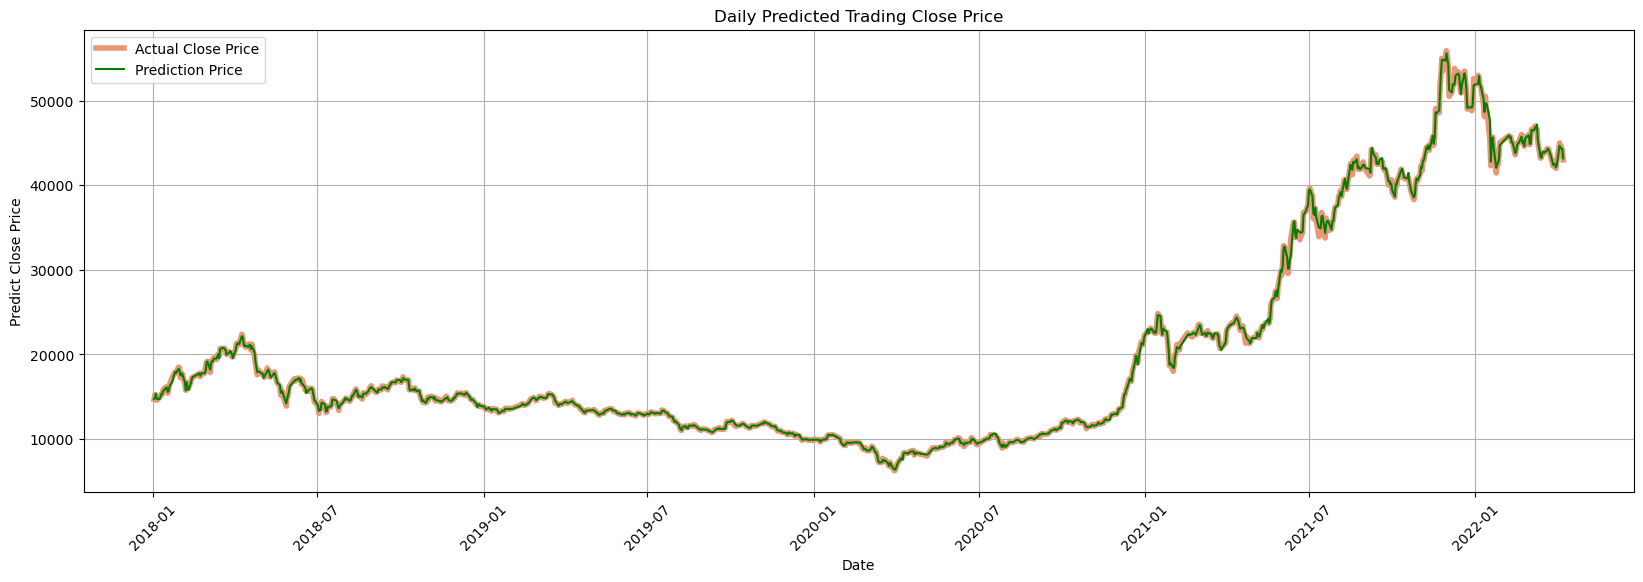

In [22]:
#Sort DataFrame by 'Date'
df = df.sort_values(by='Date')

#Make Predictionn on the entire dataset
y_pred = rf.predict(X)
plt.figure(figsize=(20,6))

#plotting actual values
plt.plot(df['Date'], df['Close'], label='Actual Close Price', color='DarkSalmon', linewidth = '4')

#Plotting predict value
star_date = '2018-01-01'
mask = (df['Date'] >= star_date) & (df['Date'] < pd.to_datetime('today')) #boolean condition to filter the dataframe
plt.plot(df.loc[mask, 'Date'], y_pred[mask], label = 'Prediction Price', color = 'Green') #date that mask is true and the y_pred of it

plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('Predict Close Price')
plt.title('Daily Predicted Trading Close Price')

plt.grid(True)
plt.legend()
plt.show()

Using LSTM for Predicting

In [23]:
df = df.set_index('Date')


In [24]:
df = df[['Close']]

Normalize the Data

In [25]:
from sklearn.preprocessing import MinMaxScaler #use for scaling and normalizing data

#Normalize
scaler = MinMaxScaler() #initilaize object
df_scaled = scaler.fit_transform(df) #fit the scaler by calculating min and max value, then transform to 0 1

#Split the data into training and testing set
train_size = int(len(df_scaled) * 0.8) #len for counting total number in row, 0.8 for 80% use for train
train_data, test_data = df_scaled[:train_size], df_scaled[train_size:]


Create Sequences for LSTM

In [26]:
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range (len(data) - sequence_length):
        x.append(data[i:(i+ sequence_length), 0]) # Collect sequence of length
        y.append(data[i + sequence_length, 0]) # Collect the next value as the target
    return np.array(x), np.array(y) #Converts the list of input sequences and target value into a NumPy array.

sequence_length = 10 #each input sequence contain 20 time steps
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(train_data, sequence_length)


# Reshape to (samples, sequence_length, features) for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Build and Train

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

#Sequential: This is used to build a linear stack of layers for the model.
#LSTM: This is the LSTM layer, which is a type of recurrent neural network (RNN) that excels at learning from sequential data.
#Dense: A fully connected (or dense) layer, often used at the output or intermediate stages of a neural network.
#Dropout: This layer is used to reduce overfitting by randomly "dropping out" a fraction of neurons during training.

model = Sequential()
  #first LSTM layer with dropout
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

  #Second LSTM layer with dropout
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

  #Third LSTM layer with dropout
model.add(LSTM(units = 100, return_sequences = False))
model.add(Dropout(0.2))

  #Dense Layer
model.add(Dense(units = 50))
model.add(Dropout(0.2))

  #Output Layer
model.add(Dense(units = 1))

  #Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

  #Fit model
model.fit(X_train, y_train, epochs = 100, batch_size = 64)


ModuleNotFoundError: No module named 'tensorflow'

# Visualize actual and predict


```
# This is formatted as code
```



In [ ]:
prediction = model.predict(X_test)
prediction = scaler.inverse_transform(prediction.reshape(-1, 1))

from sklearn.metrics import mean_absolute_error
mse = mean_absolute_error(df[-len(prediction):]['Close'], prediction)
print(mse)

#plot the prediction
plt.figure(figsize=(20,6))
plt.plot(df.index[-len(prediction):], df[-len(prediction):]['Close'], label='Actual Close Price', color='DarkSalmon')
plt.plot(df.index[-len(prediction):], prediction, label = 'Prediction Price', color = 'Green')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('Predict Close Price')
plt.title('Daily Predicted Trading Close Price')

plt.grid(True)
plt.legend()
plt.show()



NameError: name 'prediction' is not defined

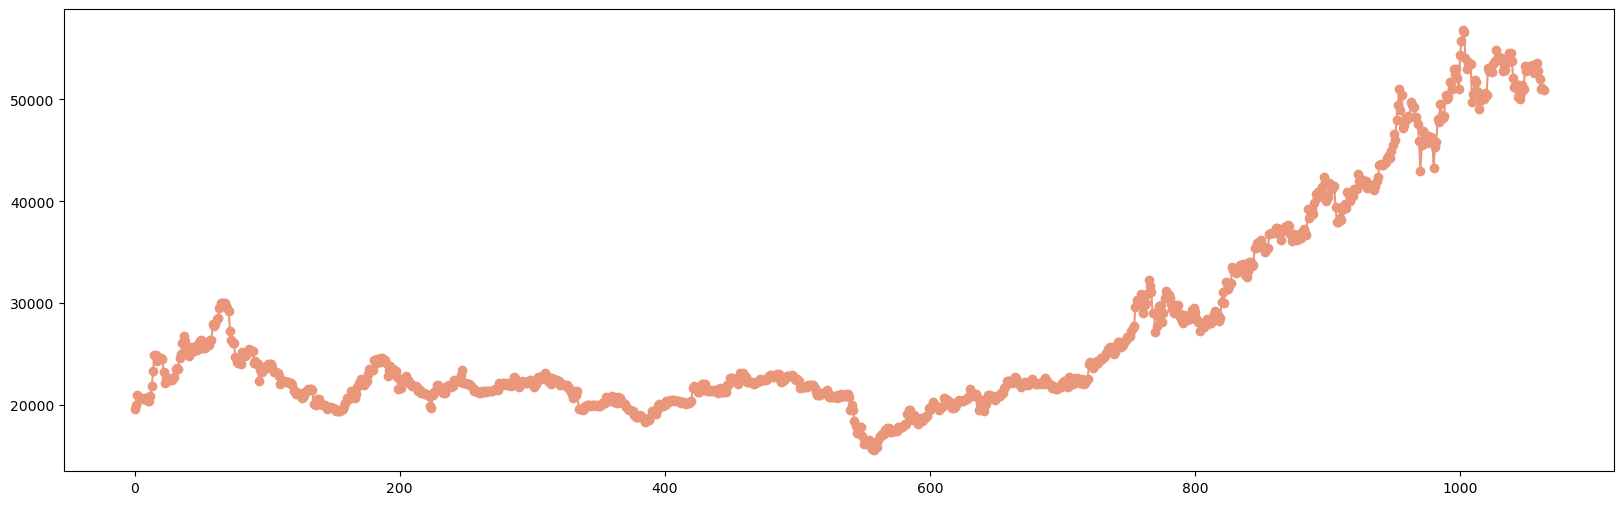

In [3]:
#update column name used for close price
close_price_column = 'Close'

#plot the historical close price
plt.figure(figsize=(20,6))
plt.plot(df.index, df[close_price_column], label = 'Historical Close Price', color = 'DarkSalmon', marker = 'o')

#plot predict close price
predicted_date = pd.date_range(start = df.index[-1], periods = len(prediction), freq = 'B') #remove [1:] to include the last date in the range
plt.plot(predicted_date, prediction, label = 'Predicted Close Price', color = 'Green', marker = 'o')

plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('Close Price')
plt.title('Historical and Predicted Close Price')

plt.grid(True)
plt.legend()
plt.show()